# DataLoader Testing

## Imports

In [18]:
# Add Utils to path
import sys
sys.path.append('../Utils')  # Adds higher directory to python modules path.

# Utils
from image_enhancement_functions import histogram_equalization, clahe, color_balance_adjustment, min_max_contrast_enhancement
from custom_image_dataset import CustomImageDataset

# PyTorch
import torch
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader
from transformers import DetrImageProcessor

# Other
import numpy as np
from PIL import ImageDraw
import matplotlib.pyplot as plt

## Test

In [25]:
def collate_fn(batch):
    imgs = [b[0] for b in batch]
    max_h = max([img.size(1) for img in imgs])
    max_w = max([img.size(2) for img in imgs])
    imgs = [F.pad(img, (0, max_w - img.size(2), 0, max_h - img.size(1))) for img in imgs]
    labels = [b[1] for b in batch]
    b_box = [b[2] for b in batch]
    return {
        'imgs': imgs,
        'labels': labels,
        'b_box': b_box
    }

First image of batch 0 
   Image size: torch.Size([3, 1083, 1280]) 
   Label: 3 == Bus 
   Bounding box: [528, 343, 806, 429]


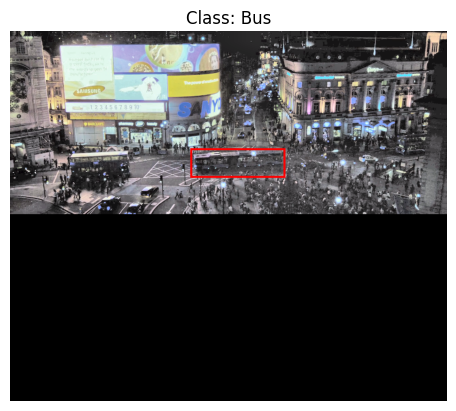

First image of batch 1 
   Image size: torch.Size([3, 1088, 1920]) 
   Label: 3 == Bus 
   Bounding box: [64, 221, 403, 432]


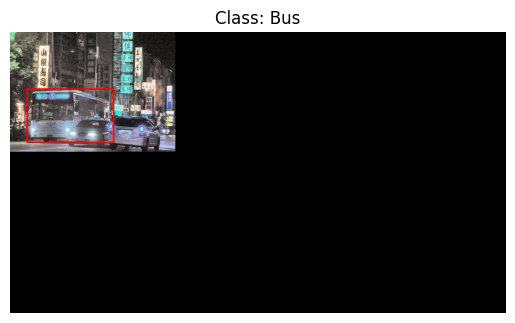

In [26]:
# Image directory
img_dir = '../ExDark/ExDark'
box_dir = '../ExDark_Annno/ExDark_Annno'

# Define transformations
transform = transforms.Compose([histogram_equalization,
                                clahe,
                                color_balance_adjustment,
                                min_max_contrast_enhancement,
                                transforms.ToTensor()])

# Create dataset
dataset = CustomImageDataset(img_dir=img_dir, box_dir=box_dir, transform=transform)

# Create dataloader
dataloader = DataLoader(dataset, collate_fn=collate_fn, batch_size=32, shuffle=True)

# Iterate over data
for i, data in enumerate(dataloader):
    
    # Data
    tensor_image = data['imgs'][0]
    image = transforms.ToPILImage()(tensor_image)
    label = data['labels'][0]
    b_box = data['b_box'][0]
    b_box = [int(x) for x in b_box]
    b_box = [b_box[0], b_box[1], b_box[2] + b_box[0], b_box[3] + b_box[1]] 

    # Print info
    print('First image of batch', i, '\n',
          '  Image size:', tensor_image.shape, '\n',
          '  Label:', label, '==', dataset.classes[label], '\n',
          '  Bounding box:', b_box)
    
    # Plot image
    draw = ImageDraw.Draw(image)
    draw.rectangle(b_box, outline = 'red', width = 6, fill = None)
    plt.imshow(image)
    plt.title('Class: ' + dataset.classes[label])
    plt.axis("off")
    plt.show()

    # Exit condition
    if i == 1:
        break
